In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data_file = pd.read_csv("./sales data file.csv")

In [3]:
data_file.head(15)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [4]:
data_file.shape

(200, 4)

In [5]:
data_file.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data_file.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
sns.set()

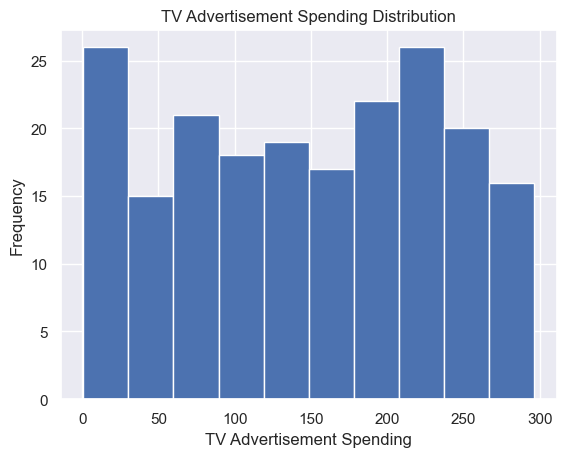

In [8]:
data_file['TV'].hist()
plt.title('TV Advertisement Spending Distribution')
plt.xlabel('TV Advertisement Spending')
plt.ylabel('Frequency')
plt.show()

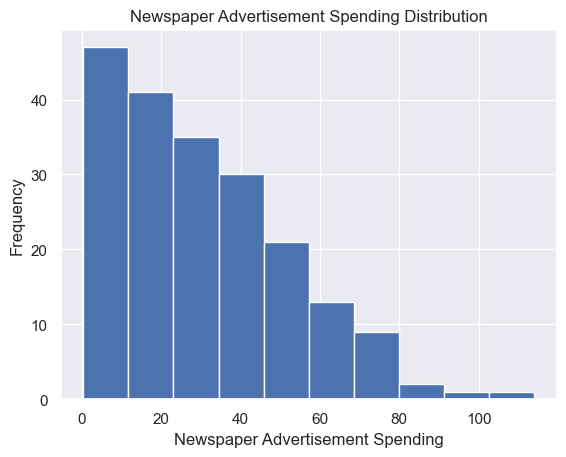

In [9]:
data_file['Newspaper'].hist()
plt.title('Newspaper Advertisement Spending Distribution')
plt.xlabel('Newspaper Advertisement Spending')
plt.ylabel('Frequency')
plt.show()

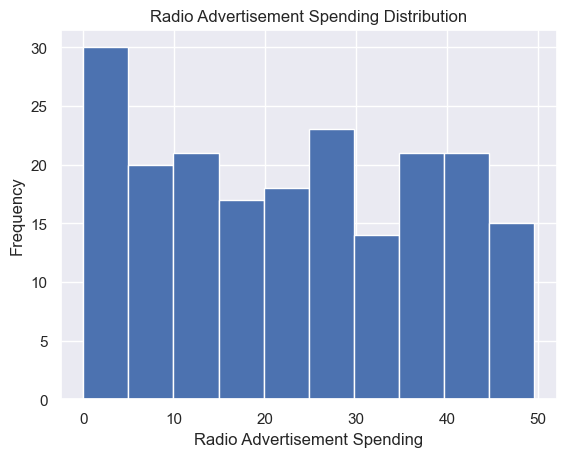

In [10]:
data_file['Radio'].hist()
plt.title('Radio Advertisement Spending Distribution')
plt.xlabel('Radio Advertisement Spending')
plt.ylabel('Frequency')
plt.show()

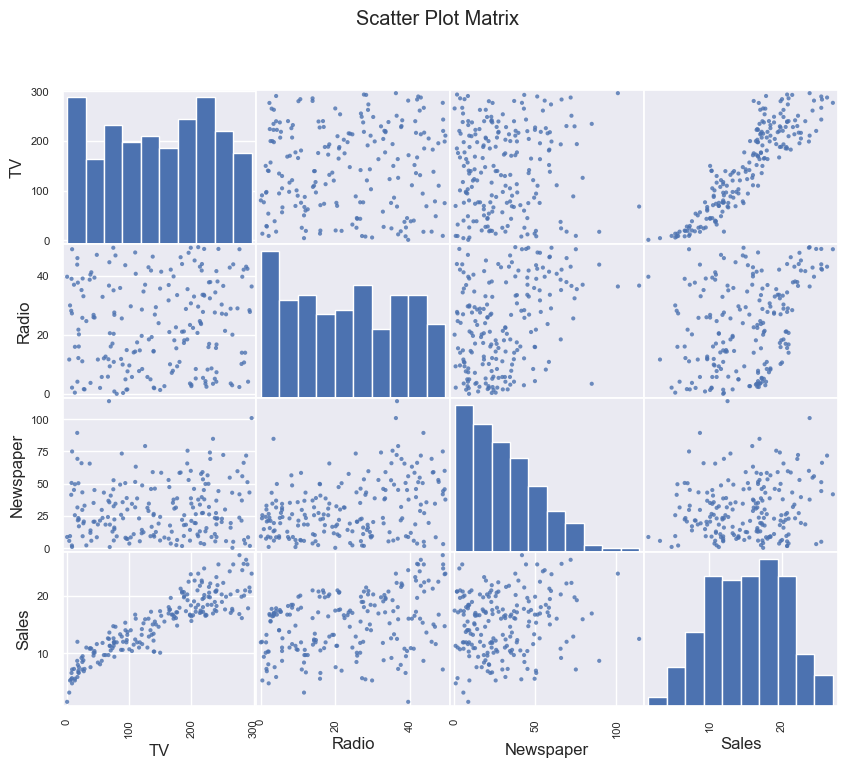

In [11]:
scatter_matrix = pd.plotting.scatter_matrix(data_file[['TV', 'Radio', 'Newspaper', 'Sales']], figsize=(10, 8), alpha=0.8, diagonal='hist')
plt.suptitle('Scatter Plot Matrix')
plt.show()

In [12]:
total_sales = data_file['Sales'].sum()
sales_by_channel = data_file[['TV', 'Radio', 'Newspaper']].sum()

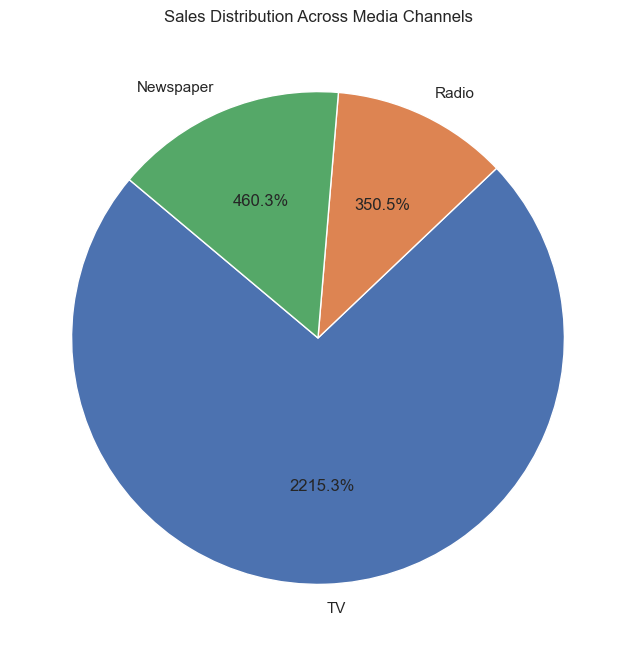

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(sales_by_channel, labels=sales_by_channel.index, autopct=lambda p: '{:.1f}%'.format(p * total_sales / 100), startangle=140)
plt.title('Sales Distribution Across Media Channels')
plt.show()

In [14]:
X = data_file.drop(columns='Sales')
Y = data_file['Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

In [15]:
model = LinearRegression()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

In [16]:
print("Model Intercept:", model.intercept_)
print("Model Coefficients:", model.coef_)
accuracy_score = model.score(X_test, Y_test) * 100
print(f"Accuracy of the model: {accuracy_score}%")

Model Intercept: 5.022730805826264
Model Coefficients: [ 0.05223455  0.10672463 -0.00120158]
Accuracy of the model: 88.77675297095178%
